In [36]:
import pandas as pd


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
forest_model = RandomForestRegressor(random_state=1)


In [31]:
df = pd.read_csv('/home/dov-wachtfogel/PycharmProjects/MigdalDavid/all_PM10_PM25.csv').sample(n=10000)
df

,year,month,day,hour,day_of_week,holiday,day_of_year,PM10,PM25
894358,2019,8,11,15.0,1,0,223,31.8,22.6
1123408,2002,4,15,14.0,2,0,105,156.2,69.9
834845,2015,2,14,8.5,7,0,45,5.3,4.8
375920,2004,2,14,14.5,7,0,45,10.6,4.8
1356277,2016,2,16,3.0,3,0,47,22.5,6.4
...,...,...,...,...,...,...,...,...,...
567731,2018,2,18,15.5,1,0,49,38.8,15.3
2363306,2016,10,18,12.5,3,0,292,33.7,12.6
921512,2021,5,16,7.5,1,0,136,40.7,20.0
1090206,2000,4,17,0.0,2,0,108,21.1,34.3


In [32]:
X = df.PM10
y = df.PM25

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


In [33]:
forest_model.fit(train_X.to_numpy().reshape(-1,1), train_y.to_numpy().reshape(-1,1))
melb_preds = forest_model.predict(val_X.to_numpy().reshape(-1,1))
print(mean_absolute_error(val_y.to_numpy().reshape(-1,1), melb_preds))

/tmp/ipykernel_7094/3311511415.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(train_X.to_numpy().reshape(-1,1), train_y.to_numpy().reshape(-1,1))


5.67184390240278


In [28]:
mini_df = df.sample(n=10)
mini_forest_model = RandomForestRegressor(random_state=1)
mini_X = mini_df.PM10
mini_y = mini_df.PM25

from sklearn.model_selection import train_test_split

mini_train_X, mini_val_X, mini_train_y, mini_val_y = train_test_split(mini_X, mini_y,random_state = 0)
mini_forest_model.fit(mini_train_X.to_numpy().reshape(-1,1), mini_train_y.to_numpy().reshape(-1,1))
mini_melb_preds = mini_forest_model.predict(val_X.to_numpy().reshape(-1,1))
print(mean_absolute_error(val_y.to_numpy().reshape(-1,1), mini_melb_preds))

/tmp/ipykernel_7094/1614746601.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mini_forest_model.fit(mini_train_X.to_numpy().reshape(-1,1), mini_train_y.to_numpy().reshape(-1,1))


7.572417566666673


In [22]:
import pickle

filename = "/home/dov-wachtfogel/PycharmProjects/MigdalDavid/PM10_to_PM25_model.pickle"

# save model
pickle.dump(forest_model, open(filename, "wb"))

# load model
#loaded_model = pickle.load(open(filename, "rb"))

In [40]:
def model_per_rows_number(examples_df, n:int):
    df = examples_df.sample(n=n)
    try:
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.metrics import mean_absolute_error, r2_score
        from sklearn.model_selection import train_test_split
    except ImportError:
        None
    forest_model = RandomForestRegressor(random_state=1)
    X = df.PM10
    y = df.PM25
    train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
    forest_model.fit(train_X.to_numpy().reshape(-1,1), train_y.to_numpy().reshape(-1,1))
    melb_preds = mini_forest_model.predict(val_X.to_numpy().reshape(-1,1))
    mae = mean_absolute_error(val_y.to_numpy().reshape(-1,1), melb_preds)
    mean_squared_error(val_y.to_numpy().reshape(-1,1), melb_preds)
    r2 = r2_score(val_y.to_numpy().reshape(-1,1), melb_preds)
    return forest_model, mae, r2



In [44]:
df = pd.read_csv('/home/dov-wachtfogel/PycharmProjects/MigdalDavid/all_PM10_PM25.csv')
model_per_rows_number(df, 1000000)

/tmp/ipykernel_7094/1054270215.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(train_X.to_numpy().reshape(-1,1), train_y.to_numpy().reshape(-1,1))


KeyboardInterrupt: 

In [37]:
r2_score(val_y.to_numpy().reshape(-1,1), melb_preds)

0.5362469807884623

<Axes: xlabel='PM10', ylabel='PM25'>

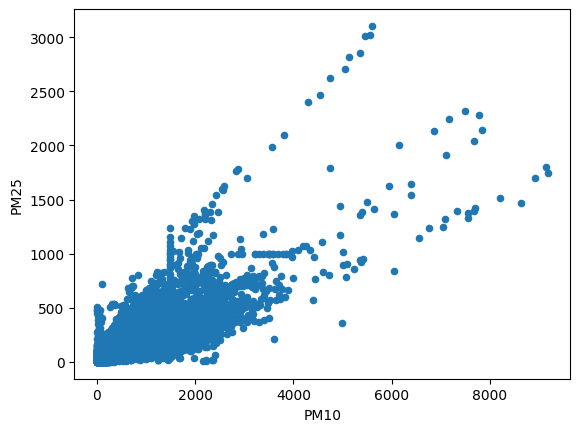

In [45]:
df = pd.read_csv('/home/dov-wachtfogel/PycharmProjects/MigdalDavid/all_PM10_PM25.csv')
df.plot.scatter(x='PM10', y='PM25')